In [1]:
import sklearn.datasets
import sklearn.linear_model
import numpy as np
import matplotlib.pyplot as plt
from mlp import normalize,Layer

[[0.   0.01 0.02 ... 1.07 1.08 1.09]
 [0.   0.   0.   ... 1.09 1.09 1.09]]
[[ -4.78586202 -11.66039439  -9.35844916 ...  -6.76404595 -11.65606184
   -7.47982807]
 [ -5.19600086   2.29271486   9.92234918 ...  -2.6065341   10.75673606
   -3.66525263]
 [-10.8880594   11.9525311   -9.75603195 ...   4.4142338   10.81111813
    3.09369191]
 ...
 [-10.37099372  11.91861482  -9.26070292 ...   4.34323186  10.74310791
    3.39177638]
 [  9.39194817 -12.32642507   9.85210327 ...  -5.47053372 -10.11520017
   -3.95581043]
 [-20.92059701   2.26163947  -9.94938793 ...  -4.29634528   9.24978043
   -8.7293043 ]]
(1732,)


100%|██████████| 200/200 [00:49<00:00,  4.00it/s]


(434, 2)
[[0.27841652 0.74886491]
 [0.39078544 0.31006443]
 [0.93389167 0.46950813]
 [0.63685435 0.29295243]
 [0.89214704 0.42463393]
 [0.66800407 0.28292001]
 [0.41939811 0.52716039]
 [0.40995374 0.55467528]
 [0.39953607 0.54079986]
 [0.34900298 0.29692291]
 [0.92596973 0.44816749]
 [0.06415538 0.5581687 ]
 [0.31366808 0.73319604]
 [0.70202258 0.2667599 ]
 [0.08706194 0.56678226]
 [0.08739529 0.57343301]
 [0.31359676 0.32019961]
 [0.41709389 0.53322904]
 [0.09932309 0.57963721]
 [0.37490747 0.73528557]
 [0.92381738 0.45106304]
 [0.9246583  0.44958257]
 [0.08758112 0.54657529]
 [0.10068936 0.54039536]
 [0.40994196 0.54287376]
 [0.43687728 0.29128516]
 [0.38104029 0.26627786]
 [0.40637321 0.26976047]
 [0.87054613 0.4369143 ]
 [0.3495469  0.29763375]
 [0.36111048 0.27737206]
 [0.41713811 0.53623721]
 [0.42021818 0.55150582]
 [0.92290679 0.44732584]
 [0.85863256 0.43899198]
 [0.10371807 0.5564245 ]
 [0.91277407 0.45067668]
 [0.09392552 0.54575647]
 [0.72098329 0.27253894]
 [0.10356182 0.5

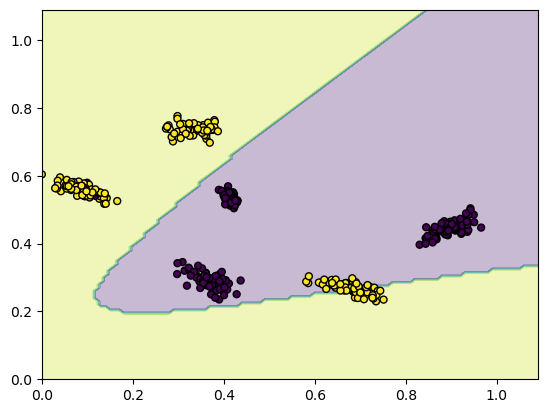

In [2]:

mesh = np.meshgrid(np.arange(0, 1.1, 0.01), np.arange(0, 1.1, 0.01))[0]

mmesh = np.stack((mesh.flatten(), mesh.T.flatten()))

print(mmesh)

x, y = sklearn.datasets.make_classification(class_sep=10, n_samples=2166, n_features=8, n_informative=4, n_classes=2,
                                            n_redundant=4, n_clusters_per_class=3, n_repeated=0, random_state=215366)
print(x)
x = x[:,[0,1]]
x = normalize(x)

x, x_test, y, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=215366)


test = Layer()


print(y.shape)

test.nowa_warstwa(neurony=100, wejscia=2)
test.nowa_warstwa(neurony=100, wejscia=100)
test.nowa_warstwa(neurony=100, wejscia=100)
test.nowa_warstwa(neurony=1, wejscia=100)

test.learn( 200, x, y)
print(x_test.shape)
u = test.predict(x_test)
#wyswietlanie ------------------------------------
#macierz_pomylek = confusion_matrix(y_test, u)
#print(macierz_pomylek)

z = test.predict(mmesh.T)
z = z.reshape(mesh.shape)
plt.contourf(mesh, mesh.T, z, alpha=0.3)
plt.scatter(x_test[:, 0], x_test[:, 1], marker="o", c=y_test, s=25, edgecolor="k")

# disp = ConfusionMatrixDisplay(confusion_matrix=macierz_pomylek,display_labels= [0,1])
# fig, ax = plt.subplots(figsize=(15, 15))
# disp.plot(ax=ax)
plt.show()


